In [ ]:
#!pip3 install sklearn
#!pip3 install xgboost

In [68]:
from PIL import Image
import os
from os import listdir
from os.path import isfile, join
import numpy as np
from tqdm.notebook import tqdm
import cv2
import pickle
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.model_selection import train_test_split as tts
import pandas as pd
from time import sleep
from subprocess import call 

In [41]:
def getImageVector(img,wc_=True):
    img = Image.open(img)
    img = img.resize( (40, 40) )
    img = img.convert('L')
    return imgToVector(img,wc=wc_) 

In [42]:
#Funcion para vectorizar imagenes y asignales clasificación
def imgToVector(img,x=40,y=40,classification=1,wc=True):
    vector=[]
    if wc==True:
        vector.append(classification)
        
    for j in range(y):
        for i in range(x):
            vector.append(img.getpixel((i,j)))
    return vector
        

In [43]:
def reconstructor(vector,x=40,y=40):
    reb=Image.new('L',(x,y))
    for j in range(y):
        for i in range(x):
            reb.putpixel((i,j),vector[i+j*x]) 
    return reb

In [69]:
def clear(): 
    # check and make call for specific operating system 
    _ = call('clear' if os.name =='posix' else 'cls')

In [44]:
#Cargando datos para entrenar

mask = []
with (open("mask", "rb")) as openfile:
    while True:
        try:
            mask.append(pickle.load(openfile))
        except EOFError:
            break
mask=mask[0]

nomask = []
with (open("nomask", "rb")) as openfile:
    while True:
        try:
            nomask.append(pickle.load(openfile))
        except EOFError:
            break
nomask=nomask[0]

In [45]:
XYTrain=mask+nomask
len(XYTrain)
XYTrain = pd.DataFrame(XYTrain)

In [46]:
X_train, X_test, y_train, y_test=tts(XYTrain.drop(0, axis=1),XYTrain[0], test_size=0.2, random_state=101)

In [55]:
X_train, X_test, y_train, y_test=tts(XYTrain.drop(0, axis=1),XYTrain[0], test_size=1, random_state=101)

In [39]:
gnb=GNB()
gnb.fit(X_train, y_train)

train_score=gnb.score(X_train, y_train)
test_score=gnb.score(X_test, y_test)

print (train_score, test_score)

0.7380726097700057 0.7286202964652223


In [15]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

gbc=GBC()
gbc.fit(X_train, y_train)

train_score=gbc.score(X_train, y_train)
test_score=gbc.score(X_test, y_test)

print (train_score, test_score)

#Saving model
pickle.dump(gbc,open("gbc","wb"))

0.9271593673965937 1.0


In [56]:
from xgboost import XGBClassifier as XGBC

xgbc=XGBC()
xgbc.fit(X_train, y_train)

train_score=xgbc.score(X_train, y_train)
test_score=xgbc.score(X_test, y_test)

print (train_score, test_score)

pickle.dump(xgbc,open("xgbc","wb"))

1.0 1.0


In [6]:
#Carga de modelo guardado
xgbc = []
with (open("xgbc", "rb")) as openfile:
    while True:
        try:
            xgbc.append(pickle.load(openfile))
        except EOFError:
            break
xgbc=xgbc[0]
xgbc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Carga de modelo guardado
gbc = []
with (open("gbc", "rb")) as openfile:
    while True:
        try:
            gbc.append(pickle.load(openfile))
        except EOFError:
            break
gbc=gbc[0]
gbc

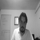

In [76]:
img='current_img.png'
X=pd.DataFrame(getImageVector(img)).T
X=X.drop(0,axis=1)
prediccion=xgbc.predict(X)
X=list(X.T[0])
reconstructor(X)


In [73]:
def rescale_frame(frame, percent=75):
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

In [75]:
cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    frame50 = rescale_frame(frame,percent=50)
    cv2.imshow("test", frame50)
    
    
    cv2.imwrite("current_img.png", frame)
    
    img='current_img.png'
    X=pd.DataFrame(getImageVector(img)).T
    X=X.drop(0,axis=1)
    prediccion=xgbc.predict(X)
    X=list(X.T[0])
    reconstructor(X)
    
    os.system('clear')
    print('💀') if prediccion == 0 else print('😷')
    
    sleep(1)    
    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    

print('Release')
cam.release()
print('Destroy')
cv2.destroyAllWindows()
print('End')

💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
😷
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
💀
😷
💀
💀
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
💀
😷
😷
😷
😷
😷
💀
💀
💀
💀
💀
💀
😷
😷
😷
😷
😷
💀
😷
😷
😷
😷
😷
😷
😷
😷
😷
😷
💀
💀
💀
💀
💀
💀
😷


KeyboardInterrupt: 